# Section 5.1: MNIST dataset with noise  
We try to add noise to MNIST images and see how the noise affect the neural network performance

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

train_images_random_noise = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], 
    axis = 1
)
train_images_zeros_noise = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))],
    axis = 1
)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')
    ])
    model.compile(optimizer = 'rmsprop',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    return model

model = get_model()
random_noise_history = model.fit(train_images_random_noise, 
                                 train_labels,
                                 batch_size = 128,
                                 epochs = 10,
                                 validation_split = 0.2
                                )
model = get_model()
zeros_noise_history = model.fit(train_images_zeros_noise,
                                 train_labels,
                                 batch_size = 128,
                                 epochs = 10,
                                 validation_split = 0.2
                               )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 371us/sample - loss: 0.6370 - accuracy: 0.8090 - val_loss: 0.2857 - val_accuracy: 0.9121
Epoch 2/10
48000/48000 [==============================] - 15s 312us/sample - loss: 0.2439 - accuracy: 0.9251 - val_loss: 0.2023 - val_accuracy: 0.9390
Epoch 3/10
48000/48000 [==============================] - 15s 314us/sample - loss: 0.1608 - accuracy: 0.9503 - val_loss: 0.1915 - val_accuracy: 0.9416
Epoch 4/10
48000/48000 [==============================] - 15s 311us/sample - loss: 0.1119 - accuracy: 0.9656 - val_loss: 0.1599 - val_accuracy: 0.9525
Epoch 5/10
48000/48000 [==============================] - 15s 308us/sample - loss: 0.0823 - accuracy: 0.9733 - val_loss: 0.1608 - val_accuracy: 0.9541
Epoch 6/10
48000/48000 [==============================] - 15s 309us/sample - loss: 0.0598 - accuracy: 0.9807 - val_loss: 0.1564 - val_accuracy: 0.9567
Epoch 7/10
48000/48000 [====================

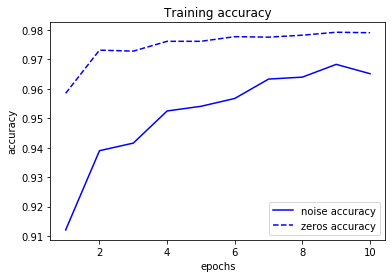

In [13]:
import matplotlib.pyplot as plt

acc_noise = random_noise_history.history['val_accuracy']
acc_zeros = zeros_noise_history.history['val_accuracy']
epochs = range(1, len(acc_noise) + 1)
plt.plot(epochs, acc_noise, 'b-', label = "noise accuracy")
plt.plot(epochs, acc_zeros, 'b--', label = "zeros accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy")
plt.legend()

### Try shuffling the training labels and train the model again  
---> Training process works, the loss reduces but validation score don't

In [14]:
train_labels_random = train_labels[:]
np.random.shuffle(train_labels_random)

model = get_model()
model.fit(train_images, 
          train_labels_random,
          epochs = 10,
          batch_size = 128,
          validation_split = 0.2
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 198us/sample - loss: 2.3164 - accuracy: 0.1041 - val_loss: 2.3076 - val_accuracy: 0.1058
Epoch 2/10
48000/48000 [==============================] - 9s 182us/sample - loss: 2.2998 - accuracy: 0.1163 - val_loss: 2.3111 - val_accuracy: 0.1047
Epoch 3/10
48000/48000 [==============================] - 9s 184us/sample - loss: 2.2895 - accuracy: 0.1275 - val_loss: 2.3228 - val_accuracy: 0.1067
Epoch 4/10
48000/48000 [==============================] - 9s 182us/sample - loss: 2.2764 - accuracy: 0.1419 - val_loss: 2.3317 - val_accuracy: 0.0987
Epoch 5/10
48000/48000 [==============================] - 9s 187us/sample - loss: 2.2586 - accuracy: 0.1557 - val_loss: 2.3409 - val_accuracy: 0.1039
Epoch 6/10
48000/48000 [==============================] - 9s 189us/sample - loss: 2.2361 - accuracy: 0.1715 - val_loss: 2.3563 - val_accuracy: 0.0967
Epoch 7/10
48000/48000 [=========================